In [1]:
!pip install -r requirements.txt

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 56.7 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 66.2 MB/s eta 0:00:00:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 741.1/741.1 kB 57.9 MB/s eta 0:00:00
  Created wheel for goes-solar-retriever: filename=goes_solar_retriever-0.4.0-py3-none-any.whl size=3736 sha256=317c27af1dfb55e9b3c3ad305f6d57588ee9a031e6299ff2c1fab4e739993a1f
  Stored in directory: /root/.cache/pip/wheels/82/d9/4d/dca44d1fa342682762ec5f2cd28a6389022931da8658967e5a
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1256 sha256=3d16ae47420e2c0af399435534e6a069d0d121f0d9fee752fda319642803d7f7
  Stored in directory: /root/.cache/pip/wheels/8b/ac/c5/cb646ab01df6f353a9994b1c97dffb94f9b12013d64c162c58
Successfully built goes-solar-retriever bs4


In [2]:
!pip install -U astropy pytest

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.5/320.5 kB 25.6 MB/s eta 0:00:00
  Attempting uninstall: pytest
    Found existing installation: pytest 7.2.1
    Uninstalling pytest-7.2.1:
      Successfully uninstalled pytest-7.2.1


In [3]:
!pip install -U attrs==19.1.0

  Attempting uninstall: attrs
    Found existing installation: attrs 18.2.0
    Uninstalling attrs-18.2.0:
      Successfully uninstalled attrs-18.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gradient 2.0.6 requires attrs<=19, but you have attrs 19.1.0 which is incompatible.


In [4]:
!pip install git+https://github.com/facebookresearch/segment-anything.git

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-exh1e95v
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-exh1e95v
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36588 sha256=c0c3297035326e746210a385285831159f0d001ba67018d8da0155dffa96d56d
  Stored in directory: /tmp/pip-ephem-wheel-cache-k2nlp220/wheels/d5/11/03/7aca746a2c0e09f279b10436ced7175926bc38f650b736a648
Successfully built segment-anything


In [5]:
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth &> /dev/null

In [239]:
model_type = 'vit_b'
checkpoint = 'sam_vit_b_01ec64.pth'
device = 'cuda:0'

In [240]:
from segment_anything import SamPredictor, sam_model_registry
sam_model = sam_model_registry[model_type](checkpoint=checkpoint)
sam_model.to(device)
sam_model.train();

In [8]:
from cordmap.data import SUVIImageDataset

In [9]:
chosen_channels = ("Product.suvi_l2_ci171", "Product.suvi_l2_ci284", "Product.suvi_l2_ci304")

In [257]:
#d = SUVIImageDataset("../datasets/cordmap-test/index.csv", "../datasets/cordmap-test/", image_dim=(1024, 1024), channels=chosen_channels)
d = SUVIImageDataset("../datasets/cordmap-1/good_index.csv", "../datasets/cordmap-1/", image_dim=(1024, 1024), channels=chosen_channels)

In [258]:
import torch

In [260]:
from collections import defaultdict


In [261]:
import numpy as np

In [262]:
help(sam_model.preprocess)

Help on method preprocess in module segment_anything.modeling.sam:

preprocess(x: torch.Tensor) -> torch.Tensor method of segment_anything.modeling.sam.Sam instance
    Normalize pixel values and pad to a square input.



In [263]:
import cv2

In [271]:
index = []
for k in d.index.index[:25]:
    try:
        d[k]
    except:
        pass
    else:
        index.append(k)
        

In [276]:
transformed_data = defaultdict(dict)
ground_truth_masks = {}

theme = 3

for i in index:
    print(i)
    cube, label = d[i]
    input_cube_torch = torch.as_tensor(cube, device=device)
    transformed_image = input_cube_torch.contiguous()[None, :, :, :]
    this_input = sam_model.preprocess(transformed_image)
    #this_input = transformed_image
    
    label = cv2.resize(label, dsize=(256, 256), interpolation=cv2.INTER_NEAREST)
    mask = (label == theme)
    mask_torch = torch.as_tensor(mask, dtype=torch.float, device=device)
    mask_torch = mask_torch.contiguous()[None, :, :]
    
    transformed_data[i]['image'] = this_input
    transformed_data[i]['input_size'] = 1024
    transformed_data[i]['original_image_size'] = 1280
    transformed_data[i]['mask'] = mask_torch

#d_truth = SUVIImageDataset("../datasets/cordmap-test/index.csv", "../datasets/cordmap-test/")
d_truth = SUVIImageDataset("../datasets/cordmap-1/good_index.csv", "../datasets/cordmap-1/", channels=chosen_channels)
for i in index:
    print(i)
    ground_truth_masks[i] = d_truth[i][1] == theme

0
1
2
3
4
5
6
7
8
10
11
13
14
15
16
17
18
19
22
24
26
27
28
29
0
1
2
3
4
5
6
7
8
10
11
13
14
15
16
17
18
19
22
24
26
27
28
29


In [277]:
# Set up the optimizer, hyperparameter tuning will improve performance here
lr = 1e-4
wd = 0
optimizer = torch.optim.Adam(sam_model.mask_decoder.parameters(), lr=lr, weight_decay=wd)

loss_fn = torch.nn.MSELoss()
# loss_fn = torch.nn.BCELoss()
keys = index

In [278]:
from statistics import mean

from tqdm import tqdm
from torch.nn.functional import threshold, normalize

num_epochs = 10
losses = []

for epoch in range(num_epochs):
    epoch_losses = []
    for k in keys:
        input_image = transformed_data[k]['image'].to(device)
        input_size = transformed_data[k]['input_size']
        original_image_size = transformed_data[k]['original_image_size']

        # No grad here as we don't want to optimise the encoders
        with torch.no_grad():
            image_embedding = sam_model.image_encoder(input_image)

            # prompt_box = bbox_coords[k]
            # box = transform.apply_boxes(prompt_box, original_image_size)
            # box_torch = torch.as_tensor(box, dtype=torch.float, device=device)
            # box_torch = box_torch[None, :]

            sparse_embeddings, dense_embeddings = sam_model.prompt_encoder(
              points=None,
              boxes=None,
              masks=transformed_data[k]['mask']#[None, :, :],
            )
        low_res_masks, iou_predictions = sam_model.mask_decoder(
          image_embeddings=image_embedding,
          image_pe=sam_model.prompt_encoder.get_dense_pe(),
          sparse_prompt_embeddings=sparse_embeddings,
          dense_prompt_embeddings=dense_embeddings,
          multimask_output=False,
        )

        upscaled_masks = sam_model.postprocess_masks(low_res_masks, (input_size, input_size), original_image_size).to(device)
        binary_mask = normalize(threshold(upscaled_masks, 0.0, 0))

        gt_mask_resized = torch.from_numpy(np.resize(ground_truth_masks[k], (1, 1, ground_truth_masks[k].shape[0], ground_truth_masks[k].shape[1]))).to(device)
        gt_binary_mask = torch.as_tensor(gt_mask_resized > 0, dtype=torch.float32)

        loss = loss_fn(binary_mask, gt_binary_mask)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_losses.append(loss.item())
    losses.append(epoch_losses)
    print(f'EPOCH: {epoch}')
    print(f'Mean loss: {mean(epoch_losses)}')

EPOCH: 0
Mean loss: 0.033202741843221396
EPOCH: 1
Mean loss: 0.003322626667795703
EPOCH: 2
Mean loss: 0.0033437346792197786
EPOCH: 3
Mean loss: 0.003307088159393364
EPOCH: 4
Mean loss: 0.0033009083296443955
EPOCH: 5
Mean loss: 0.0033001962777537606
EPOCH: 6
Mean loss: 0.003295033709340108
EPOCH: 7
Mean loss: 0.0032980600226437673
EPOCH: 8
Mean loss: 0.003293304328205219
EPOCH: 9
Mean loss: 0.0032892607705434784


In [279]:
import matplotlib.pyplot as plt

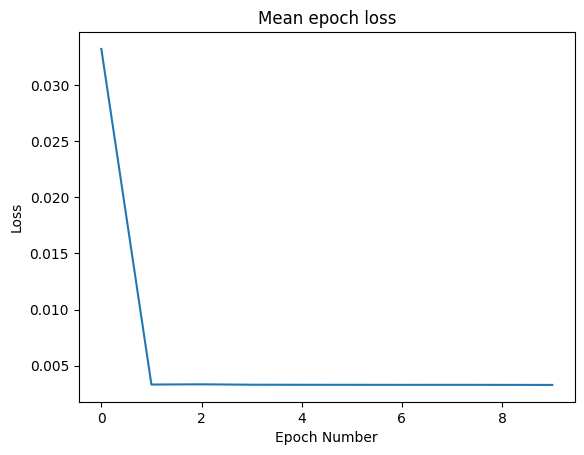

In [280]:
mean_losses = [mean(x) for x in losses]
mean_losses

plt.plot(list(range(len(mean_losses))), mean_losses)
plt.title('Mean epoch loss')
plt.xlabel('Epoch Number')
plt.ylabel('Loss')

plt.show()

In [281]:
# Load up the model with default weights
sam_model_orig = sam_model_registry[model_type](checkpoint=checkpoint)
sam_model_orig.to(device);

In [282]:
# Set up predictors for both tuned and original models
from segment_anything import sam_model_registry, SamPredictor
predictor_tuned = SamPredictor(sam_model)
predictor_original = SamPredictor(sam_model_orig)

In [283]:
# d_valid = SUVIImageDataset("../datasets/cordmap-test/index.csv", "../datasets/cordmap-test/", channels=chosen_channels)

(1024, 1024, 3)


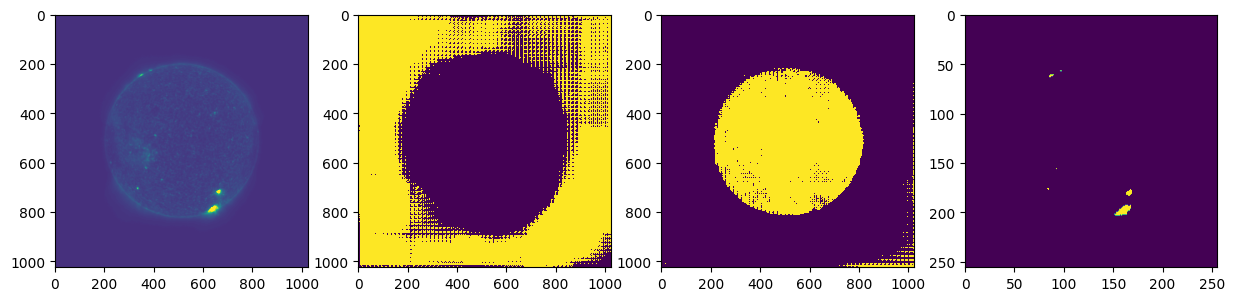

In [317]:
# The model has not seen keys[21] (or keys[20]) since we only trained on keys[:20]
i = 0
# k = keys[21]
# image = cv2.imread(f'scans/scans/{k}.png')
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = np.asarray(transformed_data[i]['image'][0].cpu()).T
    for c in range(3):
        image[:, :, c] = (image[:, :, c] - np.min(image[:, :, c])) / (np.max(image[:, :, c]) - np.min(image[:, :, c])) * 255
image = image.astype(np.uint8)
                      
print(image.shape)
mask = None # transformed_data[i]['mask']

predictor_tuned.set_image(image)
predictor_original.set_image(image)

#input_bbox = np.array(bbox_coords[k])

masks_tuned, _, _ = predictor_tuned.predict(
    point_coords=None,
    box=None,
    mask_input=mask,
    multimask_output=False,
)

masks_orig, _, _ = predictor_original.predict(
    point_coords=None,
    box=None,
    mask_input=mask,
    multimask_output=False,
)

fig, axs = plt.subplots(ncols=4, figsize=(15, 5))
axs[0].imshow(image[:, :, 1], vmin=0, vmax=100)
axs[1].imshow(masks_orig[0], interpolation='None', vmin=0, vmax=1)
axs[2].imshow(masks_tuned[0], interpolation='None', vmin=0, vmax=1)
axs[3].imshow(transformed_data[i]['mask'].cpu()[0].T)

In [75]:
masks_tuned.shapea


(1, 1024, 1024)

In [74]:
masks_orig.shape

(1, 1024, 1024)

In [119]:
masks_orig.shape

(1, 1024, 1024)

TypeError: Invalid shape (3, 1024, 1024) for image data

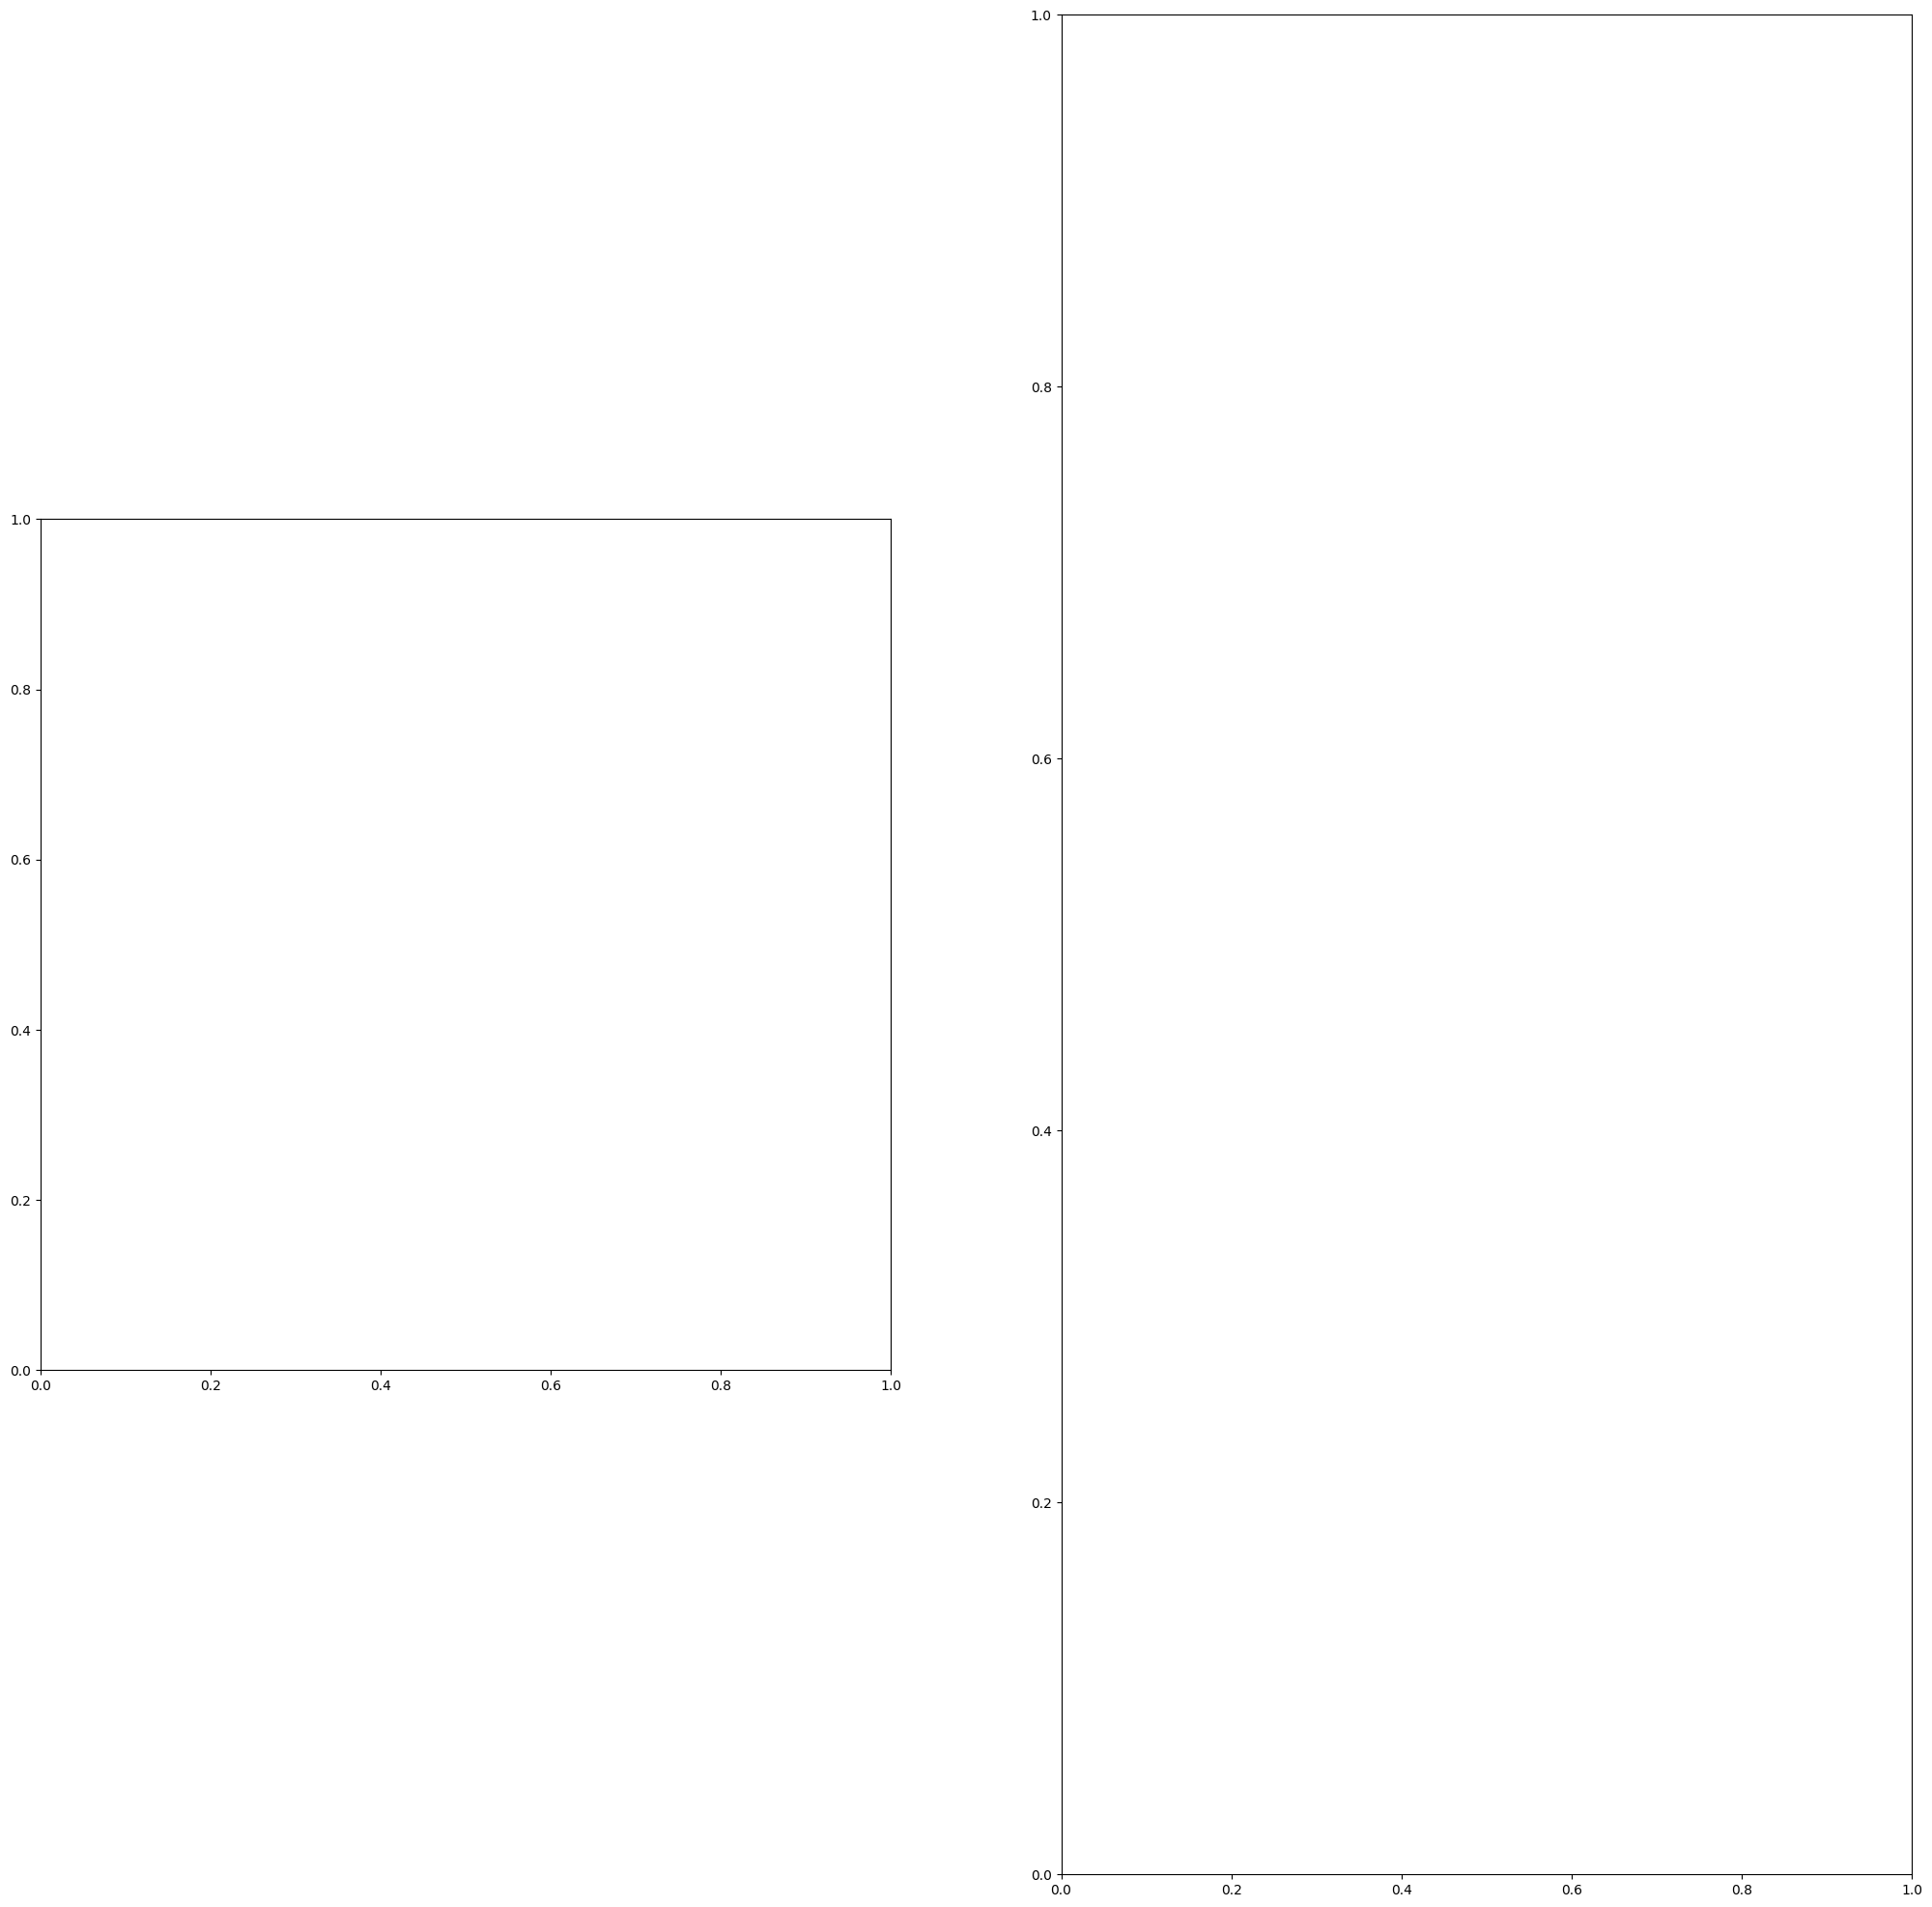

In [142]:
%matplotlib inline 
_, axs = plt.subplots(1, 2, figsize=(25, 25))


axs[0].imshow(image.cpu())
show_mask(masks_tuned, axs[0])
show_box(input_bbox, axs[0])
axs[0].set_title('Mask with Tuned Model', fontsize=26)
axs[0].axis('off')


axs[1].imshow(image)
show_mask(masks_orig, axs[1])
show_box(input_bbox, axs[1])
axs[1].set_title('Mask with Untuned Model', fontsize=26)
axs[1].axis('off')

plt.show()  